In [212]:
# Importing Libraries and Packages
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve,roc_curve,roc_auc_score, accuracy_score
%matplotlib inline
import pandas as pd
import random
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report

## Input
 
We are taking input from the data that we preprocessed in last step

In [2]:
data= pd.read_csv("C:/Users/j.wadhwani/Desktop/data_preprocessed.csv.gz")

In [3]:
data.shape

(500000, 45)

In [4]:
data.head()

,0,9,10,11,13,17,21,26,29,30,...,var4_c4ca4238a0,var4_a87ff679a2,var4_8f14e45fce,var4_e4da3b7fbb,var4_c81e728d9d,var4_eccbc87e4b,var6_6c096eda6c,var6_8a2c47a07d,var6_d581f01004,var6_e939124300
0,dc1973b893addba1b456cc83e35848c5,4.794307,1.0,4.794307,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1,247863d514c9b015984d4aed7d3cde82,6.583470,7.0,7.630225,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,b8aa642b90e96b89f470ceab63cf8d94,4.314837,11.0,8.326158,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,efdbbb631cfa47b57323165061d1fc4c,5.661163,13.0,8.548798,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,6d559c9c46bcdf62ab342e913bc1315d,6.541676,3.0,6.542167,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


## Data Normalization

There are four continuous numerical features [9,10,51,54]. We will scale them between -1 and 1

In [5]:
scaler_9 = MinMaxScaler(feature_range=(-1, 1))
scaler_10 = MinMaxScaler(feature_range=(-1, 1))
scaler_51= MinMaxScaler(feature_range=(-1, 1))
scaler_54 = MinMaxScaler(feature_range=(-1, 1))

In [6]:
data['9'] = scaler_9.fit_transform(data['9'].values.reshape(-1,1))
data['11'] = scaler_9.fit_transform(data['11'].values.reshape(-1,1))
data['51'] = scaler_9.fit_transform(data['51'].values.reshape(-1,1))
data['54'] = scaler_9.fit_transform(data['54'].values.reshape(-1,1))

In [7]:
data.head()

,0,9,10,11,13,17,21,26,29,30,...,var4_c4ca4238a0,var4_a87ff679a2,var4_8f14e45fce,var4_e4da3b7fbb,var4_c81e728d9d,var4_eccbc87e4b,var6_6c096eda6c,var6_8a2c47a07d,var6_d581f01004,var6_e939124300
0,dc1973b893addba1b456cc83e35848c5,0.345568,1.0,0.248827,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1,247863d514c9b015984d4aed7d3cde82,0.603705,7.0,0.641714,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,b8aa642b90e96b89f470ceab63cf8d94,0.276391,11.0,0.738129,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,efdbbb631cfa47b57323165061d1fc4c,0.470637,13.0,0.768973,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,6d559c9c46bcdf62ab342e913bc1315d,0.597675,3.0,0.490975,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


## Making Custom Fuctions to visualize results

Now we are making some custom functions to visualize the model results, and print roc-auc and pr-auc curve

In [8]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

In [9]:
def plot_roc_curve(model, X_test, y_test):
    y_prob= model.predict_proba(X_test)[:,1]
    log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_prob)
    auc = sklearn.metrics.auc(log_fpr, log_tpr)
    plt.figure(figsize=(8,6))
    title_1= "ROC Curve "+str(round(auc,2))
    plt.title(title_1, fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, label="AUC = %.2f" % auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    

In [10]:
def plot_pr_curve(model, X_test, y_test):
    y_prob= model.predict_proba(X_test)[:,1]             
    log_fpr, log_tpr, log_thresold = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    #auc = sklearn.metrics.(log_fpr, log_tpr)
    #title_1= "PR Curve "+str(round(auc,2))
    plt.title('PR Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Recall Rate', fontsize=16)
    plt.ylabel('Precision Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
  

Seperating Target and Test Variable

In [11]:
X= data.drop(['0','55'], axis=1)
Y= data['55'].values

Splitting Train and Test variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.20)

In [213]:
print("1 values is %.2f%% of the training set." % (y_train.sum()*100/len(y_train)))
print("1 values is %.2f%% of the test set." % (y_test.sum()*100/len(y_test)))

1 values is 1.95% of the training set.
1 values is 1.97% of the test set.


## SMOTE

SMOTE stands for synthetic minority oversamping technique. Since the target class is highly imbalanced, we will use SMOTE to oversample the minority class, so that our model is not biased

In [15]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)


In [16]:
print("normal data distribution: {}".format(Counter(y_train)))
print("SMOTE data distribution: {}".format(Counter(y_train_smote)))

normal data distribution: Counter({0: 392205, 1: 7795})
SMOTE data distribution: Counter({0: 392205, 1: 392205})


## Splitting into Train and validation set

We are splitting the smote data further for validation data

In [17]:
X_train_smote_1, X_val_smote, y_train_smote_1, y_val_smote = train_test_split(X_train_smote, y_train_smote, random_state=2, test_size=0.20)

## Testing Models

Now its time to test our models. Befor that we will perform feature selection using Random Forest, then we will be trying out the following models

1. Logistic Regression
2. Random Forest
3. XGBoost
4. Catboost
5. Light GBM
6. Neural Network


We wont be trying SVM and KNN since they are very slow for this huge dataset

#### Testing a base model with smote data

We are firslty testing a base model without any tuning and compare the result with other algorithms


In [18]:
base_model= LogisticRegression()

In [19]:
base_model.fit(X_train_smote_1, y_train_smote_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print_results("Base Model Result(Logistic Regression)", y_test, base_model.predict(X_test))

Base Model Result(Logistic Regression)
accuracy: 0.87507
precision: 0.05253761795460342
recall: 0.3143438453713123
f2: 0.15743618484740407


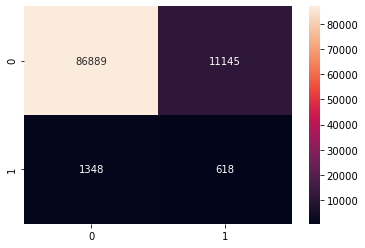

In [21]:
sns.heatmap(confusion_matrix(y_test, base_model.predict(X_test)), annot=True, fmt='g')

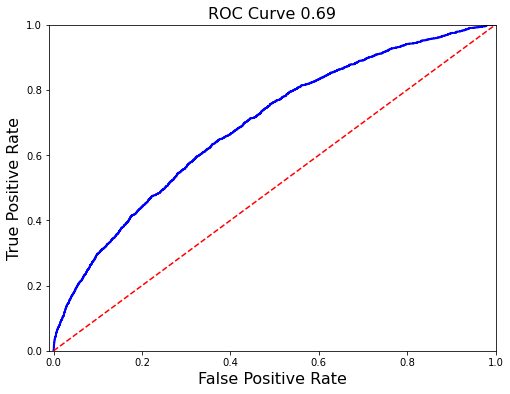

In [22]:
plot_roc_curve(base_model, X_test, y_test)

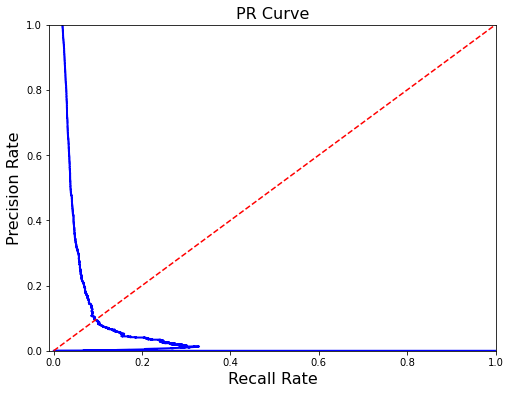

In [23]:
plot_pr_curve(base_model, X_test, y_test)

Now we have the base model result, we will move towards feature selection

#### Feature selection

In [18]:
#params of the model
param_grid = {
 'max_depth': [2,4,6],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5, 10]}

# Creating the classifier
model = RandomForestClassifier()

In [19]:
rows = random.sample(np.arange(0,len(X_train_smote_1.index)).tolist(), 50000)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring="roc_auc",  n_jobs=-1, verbose=1000)
grid_search.fit(X_train_smote_1.iloc[rows,], y_train_smote_1[rows,])

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1000)

In [20]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [21]:
model = RandomForestClassifier(max_depth=6, n_estimators=100, min_samples_leaf=1, max_features='sqrt', min_samples_split=5)

In [22]:
model.fit(X_train_smote_1, y_train_smote_1)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=5)

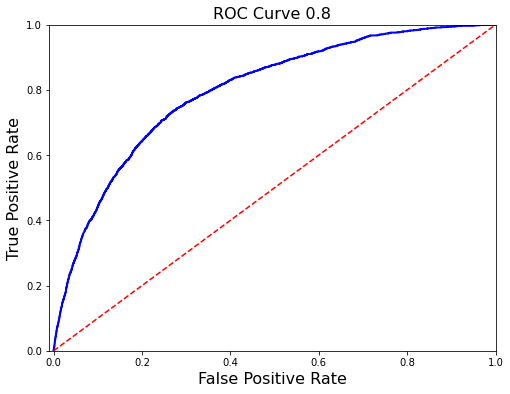

In [24]:
plot_roc_curve(model, X_test, y_test)

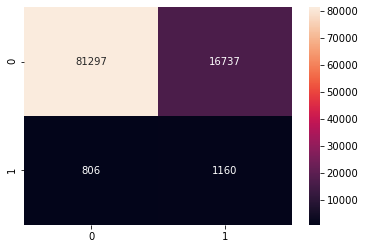

In [25]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='g')

In [26]:
print_results("Base Model Result (Random Forest) Test- dataset", y_test, model.predict(X_test))

Base Model Result(Logistic Regression)
accuracy: 0.82457
precision: 0.06481533217857742
recall: 0.590030518819939
f2: 0.22514653934241685


In [27]:
feat_import = pd.DataFrame({'Feature': X_train_smote_1.columns, 'Feature importance': model.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

Printing the Feature Importance

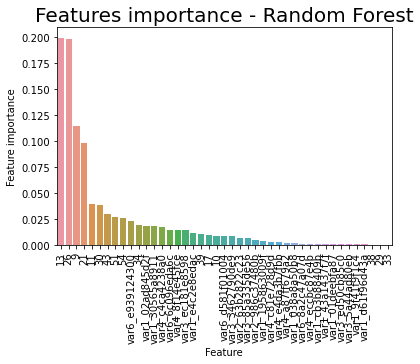

In [28]:
g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show()

In [30]:
feat_import

,Feature,Feature importance
3,13,0.199234
6,26,0.197850
0,9,0.114256
5,21,0.098247
2,11,0.039401
8,30,0.038583
13,43,0.029563
14,51,0.027222
15,54,0.025801
42,var6_e939124300,0.022560


#### Selecting the important features from dataset

In [206]:
selected_features= feat_import[feat_import['Feature importance']>=0.01][['Feature']]

In [32]:
X_train_smote_1_selected=X_train_smote_1[selected_features]

In [33]:
X_train_smote_1_selected.shape

(627528, 19)

In [34]:
X_train_selected= X_train[selected_features]
X_test_selected= X_test[selected_features]

In [211]:
#selected_features= ['13', '26', '9', '21', '11', '30', '43', '51', '54',
#       'var6_e939124300', '34', 'var1_02ad845d2f', 'var1_30565a8911',
#      'var4_c4ca4238a0', 'var6_6c096eda6c', 'var4_8f14e45fce',
#       'var3_ec181e8598', 'var1_e4c2e8edac', '39']


## Model Training

### Logistic Regression

We will tune Logistic regression with different parameters

In [35]:
param_grid = {
 'C': [100, 10, 1.0, 0.1, 0.01],
 'penalty':  ['l2'],
 'solver':  ['newton-cg', 'lbfgs', 'liblinear']}

# Creating the classifier
model_lg = LogisticRegression()

In [36]:
rows = random.sample(np.arange(0,len(X_train_smote_1_selected.index)).tolist(), 50000)

grid_search = GridSearchCV(model_lg, param_grid=param_grid, cv=3, scoring="f1",  n_jobs=-1, verbose=1000)
grid_search.fit(X_train_smote_1_selected.iloc[rows,], y_train_smote_1[rows,])

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1', verbose=1000)

In [37]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7757172053482139
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [38]:
y_train_smote_1.shape

(627528,)

In [254]:
best_lg= LogisticRegression(C=10,penalty= 'l2', solver='liblinear')

In [255]:
best_lg.fit(X_train_smote_1_selected, y_train_smote_1)

LogisticRegression(C=10, solver='liblinear')

In [256]:
print_results("Base Model Result(Logistic Regression) Train", y_train, best_lg.predict(X_train_selected))

Base Model Result(Logistic Regression) Train
accuracy: 0.7665525
precision: 0.04693488618316569
recall: 0.568697883258499
f2: 0.1764307888243254


In [257]:
print_results("Base Model Result(Logistic Regression) Test", y_test, best_lg.predict(X_test_selected))

Base Model Result(Logistic Regression) Test
accuracy: 0.76769
precision: 0.04734130869768828
recall: 0.5656154628687691
f2: 0.1773355021847989


In [43]:
print(classification_report(y_test, best_lg.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     98034
           1       0.05      0.57      0.09      1966

    accuracy                           0.77    100000
   macro avg       0.52      0.67      0.48    100000
weighted avg       0.97      0.77      0.85    100000



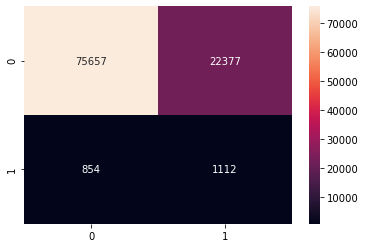

In [44]:
sns.heatmap(confusion_matrix(y_test, best_lg.predict(X_test_selected)), annot=True, fmt='g')

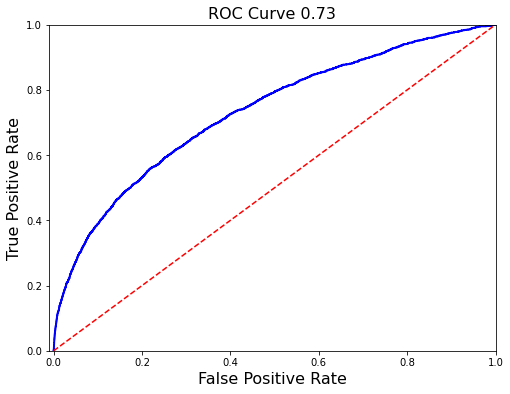

In [45]:
plot_roc_curve(best_lg, X_test_selected, y_test)

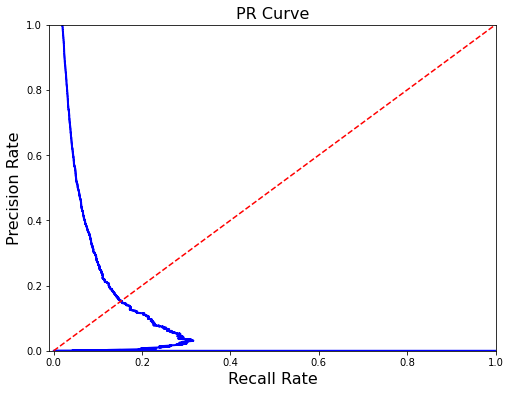

In [46]:
plot_pr_curve(best_lg, X_test_selected, y_test)

Our models result improved and roc went from 0.69 to 0.77
Now we will Try Random Forest

### Random Forest

We will tune Random Forest with depth of 6 since beyond that it becomes too slow

In [47]:
param_grid = {
 'max_depth': [6],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2,3],
 'min_samples_split': [2, 5, 10]}

# Creating the classifier
model_rf = RandomForestClassifier()

In [48]:
rows = random.sample(np.arange(0,len(X_train_smote_1_selected.index)).tolist(), 50000)

grid_search = GridSearchCV(model_rf, param_grid=param_grid, cv=3, scoring="f1",  n_jobs=-1, verbose=1000)
grid_search.fit(X_train_smote_1_selected.iloc[rows,], y_train_smote_1[rows,])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1000)

In [49]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.817138586822774
{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [258]:
best_rf= RandomForestClassifier(max_depth=6, n_estimators=100, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

In [259]:
best_rf.fit(X_train_smote_1_selected, y_train_smote_1)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=10)

In [260]:
print_results("Base Model Result(Random Forest) Train", y_train, best_rf.predict(X_train_selected))

Base Model Result(Random Forest) Train
accuracy: 0.8240475
precision: 0.06392140468227425
recall: 0.5884541372674792
f2: 0.22279968913930448


In [261]:
print_results("Base Model Result(Random Forest) Test", y_test, best_rf.predict(X_test_selected))

Base Model Result(Random Forest) Test
accuracy: 0.82582
precision: 0.06580869956164999
recall: 0.5956256358087487
f2: 0.2281939356146231


In [54]:
print(classification_report(y_test, best_rf.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     98034
           1       0.07      0.59      0.12      1966

    accuracy                           0.83    100000
   macro avg       0.53      0.71      0.51    100000
weighted avg       0.97      0.83      0.89    100000



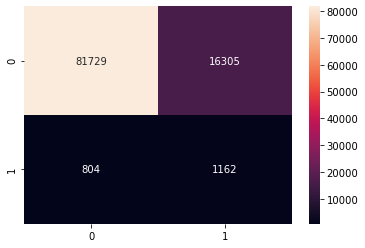

In [55]:
sns.heatmap(confusion_matrix(y_test, best_rf.predict(X_test_selected)), annot=True, fmt='g')

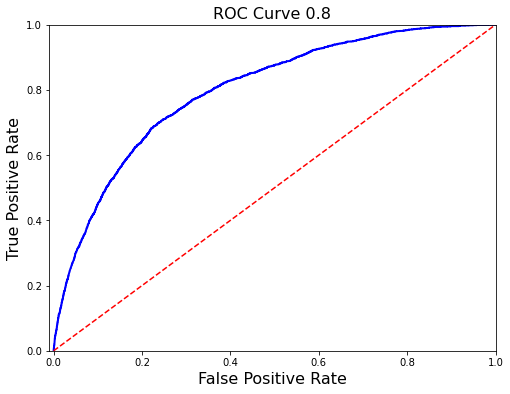

In [56]:
plot_roc_curve(best_rf, X_test_selected, y_test)

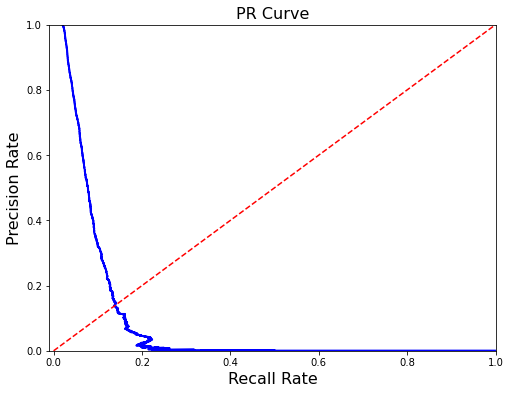

In [57]:
plot_pr_curve(best_rf, X_test_selected, y_test)

After trying out RF, ROC improved from 0.77 to 0.80

### Light GBM

Light GBM is another good algorithm for classification and hence we will try this. For tuning it, we will use Random Search CV and Optuna Later

In [58]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [34]:
n_HP_points_to_test = 300

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='auc', n_jobs=-1, n_estimators=200, is_unbalance=True)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    refit=True,
    random_state=314,
    verbose=1000)

In [35]:
gs.fit(X_train_smote_1_selected, y_train_smote_1)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(is_unbalance=True, metric='auc',
                                            n_estimators=200,
                                            random_state=314),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC8073B7F0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC804C8520>,
                                        'min_child...ght': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC80743B80>,
                          

In [36]:
print(gs.best_score_)
print(gs.best_params_)

0.9932863549494789
{'colsample_bytree': 0.8498831409295475, 'min_child_samples': 300, 'min_child_weight': 0.1, 'num_leaves': 49, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.5341287257917615}


In [262]:
best_lgbm= lgb.LGBMClassifier(max_depth=-1, is_unbalance= True,random_state=314, silent=True, metric='auc', n_jobs=-1, n_estimators=300, colsample_bytree=0.8498831409295475, 
                             min_child_samples=300, num_leaves=49, reg_alpha=0.1, reg_lambda=1, subsample=0.5341287257917615)

In [263]:
best_lgbm.fit(X_train_smote_1_selected, y_train_smote_1)

LGBMClassifier(colsample_bytree=0.8498831409295475, is_unbalance=True,
               metric='auc', min_child_samples=300, n_estimators=300,
               num_leaves=49, random_state=314, reg_alpha=0.1, reg_lambda=1,
               subsample=0.5341287257917615)

In [265]:
print_results("Base Model Result(LGBM) Train", y_train, best_lgbm.predict(X_train_selected))

Base Model Result(LGBM) Train
accuracy: 0.9461825
precision: 0.08915749162278602
recall: 0.19114817190506736
f2: 0.15555833959742754


In [266]:
print_results("Base Model Result(LGBM) Test", y_test, best_lgbm.predict(X_test_selected))

Base Model Result(LGBM) Test
accuracy: 0.94409
precision: 0.07120889519753963
recall: 0.1531027466937945
f2: 0.12447274832520058


In [43]:
print(classification_report(y_test, best_lgbm.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     98034
           1       0.07      0.12      0.09      1966

    accuracy                           0.95    100000
   macro avg       0.53      0.54      0.53    100000
weighted avg       0.96      0.95      0.96    100000



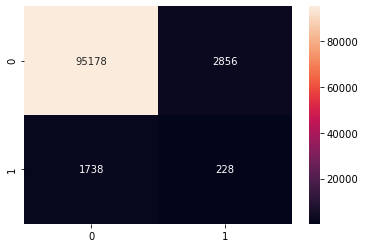

In [44]:
sns.heatmap(confusion_matrix(y_test, best_lgbm.predict(X_test_selected)), annot=True, fmt='g')

Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

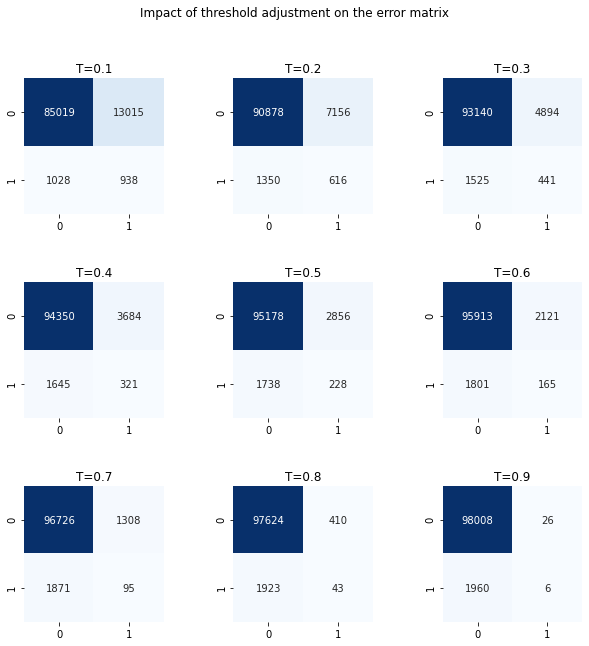

In [47]:
y_pred = best_lgbm.predict_proba(X_test_selected)[:,1]
fig, axes = plt.subplots(3,3, figsize=(10,10))
for t, ax in enumerate(axes.flat):
    threshold = (t+1)/10
    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.1f" % threshold)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

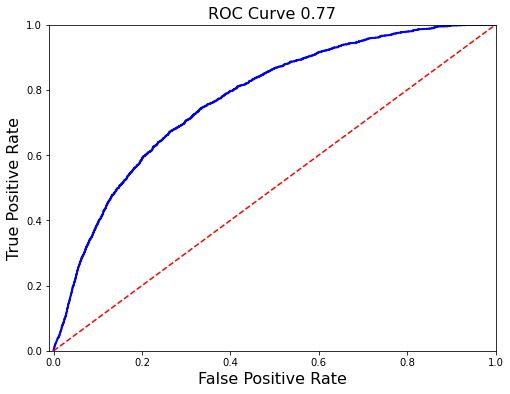

In [46]:
plot_roc_curve(best_lgbm, X_test_selected, y_test)

Light GBM didn't performed that great Now we will try Catboost

###   Catboost 

In [269]:
from catboost import CatBoostClassifier

In [104]:
params = {'depth'         : [10],
                 'learning_rate' : [0.04],
              'l2_leaf_reg':[3,1,5],
          'border_count':[50,100],
                  'iterations'    : [100]
                 }

In [107]:
model_cat= CatBoostClassifier(eval_metric='F1')

In [108]:
rows = random.sample(np.arange(0,len(X_train_smote_1_selected.index)).tolist(), 50000)

grid_search = GridSearchCV(model_cat, param_grid=params, cv=3, scoring="f1",  n_jobs=-1, verbose=1000)
grid_search.fit(X_train_smote_1_selected.iloc[rows,], y_train_smote_1[rows,])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
0:	learn: 0.7811894	total: 31.1ms	remaining: 3.08s
1:	learn: 0.8032740	total: 56.7ms	remaining: 2.78s
2:	learn: 0.8247922	total: 86.4ms	remaining: 2.79s
3:	learn: 0.8288772	total: 117ms	remaining: 2.8s
4:	learn: 0.8286297	total: 142ms	remaining: 2.69s
5:	learn: 0.8389096	total: 168ms	remaining: 2.64s
6:	learn: 0.8426249	total: 194ms	remaining: 2.57s
7:	learn: 0.8488293	total: 220ms	remaining: 2.53s
8:	learn: 0.8481066	total: 246ms	remaining: 2.49s
9:	learn: 0.8472455	total: 272ms	remaining: 2.45s
10:	learn: 0.8476056	total: 298ms	remaining: 2.41s
11:	learn: 0.8500897	total: 324ms	remaining: 2.38s
12:	learn: 0.8499550	total: 350ms	remaining: 2.34s
13:	learn: 0.8528977	total: 376ms	remaining: 2.31s
14:	learn: 0.8547406	total: 402ms	remaining: 2.28s
15:	learn: 0.8563937	total: 431ms	remaining: 2.26s
16:	learn: 0.8574692	total: 461ms	remaining: 2.25s
17:	learn: 0.8584512	total: 488ms	remaining: 2.22s
18:	learn: 0.8586116	total: 51

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001DCD8863880>,
             n_jobs=-1,
             param_grid={'border_count': [50, 100], 'depth': [10],
                         'iterations': [100], 'l2_leaf_reg': [3, 1, 5],
                         'learning_rate': [0.04]},
             scoring='f1', verbose=1000)

In [109]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9140193120626723
{'border_count': 50, 'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.04}


In [270]:
best_cat= CatBoostClassifier(eval_metric='F1', depth=10, iterations=200, learning_rate=0.04, border_count=50, l2_leaf_reg=1)

In [271]:
best_cat.fit(X_train_smote_1_selected,y_train_smote_1)

0:	learn: 0.8027377	total: 127ms	remaining: 25.3s
1:	learn: 0.8072297	total: 185ms	remaining: 18.4s
2:	learn: 0.8056276	total: 242ms	remaining: 15.9s
3:	learn: 0.8141587	total: 300ms	remaining: 14.7s
4:	learn: 0.8183178	total: 362ms	remaining: 14.1s
5:	learn: 0.8293329	total: 420ms	remaining: 13.6s
6:	learn: 0.8479413	total: 476ms	remaining: 13.1s
7:	learn: 0.8497354	total: 534ms	remaining: 12.8s
8:	learn: 0.8515352	total: 592ms	remaining: 12.6s
9:	learn: 0.8520263	total: 652ms	remaining: 12.4s
10:	learn: 0.8522402	total: 709ms	remaining: 12.2s
11:	learn: 0.8541329	total: 766ms	remaining: 12s
12:	learn: 0.8573577	total: 826ms	remaining: 11.9s
13:	learn: 0.8596545	total: 883ms	remaining: 11.7s
14:	learn: 0.8614430	total: 942ms	remaining: 11.6s
15:	learn: 0.8615991	total: 1000ms	remaining: 11.5s
16:	learn: 0.8613765	total: 1.06s	remaining: 11.4s
17:	learn: 0.8625132	total: 1.12s	remaining: 11.3s
18:	learn: 0.8629223	total: 1.18s	remaining: 11.2s
19:	learn: 0.8640081	total: 1.24s	remainin

163:	learn: 0.9364097	total: 9.69s	remaining: 2.13s
164:	learn: 0.9365134	total: 9.74s	remaining: 2.07s
165:	learn: 0.9366232	total: 9.8s	remaining: 2.01s
166:	learn: 0.9369917	total: 9.86s	remaining: 1.95s
167:	learn: 0.9371526	total: 9.92s	remaining: 1.89s
168:	learn: 0.9372115	total: 9.98s	remaining: 1.83s
169:	learn: 0.9375587	total: 10s	remaining: 1.77s
170:	learn: 0.9376685	total: 10.1s	remaining: 1.71s
171:	learn: 0.9377218	total: 10.2s	remaining: 1.65s
172:	learn: 0.9377919	total: 10.2s	remaining: 1.59s
173:	learn: 0.9377684	total: 10.3s	remaining: 1.53s
174:	learn: 0.9378575	total: 10.3s	remaining: 1.48s
175:	learn: 0.9378754	total: 10.4s	remaining: 1.42s
176:	learn: 0.9379553	total: 10.4s	remaining: 1.36s
177:	learn: 0.9379761	total: 10.5s	remaining: 1.3s
178:	learn: 0.9381560	total: 10.6s	remaining: 1.24s
179:	learn: 0.9382085	total: 10.6s	remaining: 1.18s
180:	learn: 0.9382287	total: 10.7s	remaining: 1.12s
181:	learn: 0.9382404	total: 10.7s	remaining: 1.06s
182:	learn: 0.93

In [272]:
print_results("Base Model Result(Catboost) Train", y_train, best_cat.predict(X_train_selected))

Base Model Result(Catboost) Train
accuracy: 0.9370175
precision: 0.09396004480955937
recall: 0.2582424631173829
f2: 0.19133525967607026


In [273]:
print_results("Base Model Result(Catboost) Test", y_test, best_cat.predict(X_test_selected))

Base Model Result(Catboost) Test
accuracy: 0.9354
precision: 0.07984293193717278
recall: 0.21719226856561547
f2: 0.16159551922494705


In [114]:
print(classification_report(y_test, best_cat.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     98034
           1       0.09      0.20      0.13      1966

    accuracy                           0.94    100000
   macro avg       0.54      0.58      0.55    100000
weighted avg       0.97      0.94      0.95    100000



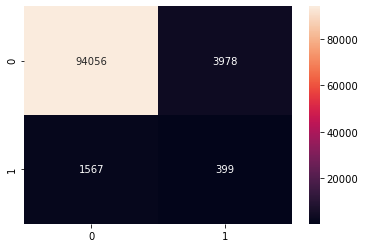

In [115]:
sns.heatmap(confusion_matrix(y_test, best_cat.predict(X_test_selected)), annot=True, fmt='g')

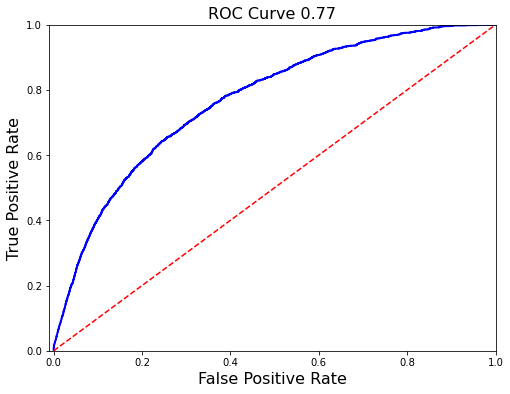

In [116]:
plot_roc_curve(best_cat, X_test_selected, y_test)

Catboost also performed average. Now we will try XGBoost

### XGBoost

We will be tuning XGBoost with different parameters

In [59]:
def xgboost_search(X, y, search_verbose=1):
    params = {
        "gamma":[0.5, 1, 1.5, 2, 5],
        "max_depth":[4,5,6],
        "min_child_weight": [100],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="aucpr", use_label_encoder=False)
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="f1", n_jobs=-1, cv=skf.split(X,y), verbose=1000)
    grid_search.fit(X, y)
    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)
    return grid_search.best_params_

In [60]:
rows = random.sample(np.arange(0,len(X_train_smote_1_selected.index)).tolist(), 5000)
model_params = xgboost_search(X_train_smote_1_selected.iloc[rows,], y_train_smote_1[rows,])

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='aucpr',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 0.81


In [274]:
best_xgb= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='aucpr',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=100,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [275]:
best_xgb.fit(X_train_smote_1_selected, y_train_smote_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='aucpr',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [278]:
print_results("Base Model Result(XGBoost) Train", y_train, best_xgb.predict(X_train_selected))

Base Model Result(XGBoost) Train
accuracy: 0.907885
precision: 0.08148212176218055
recall: 0.3627966645285439
f2: 0.21460986234006707


In [279]:
print_results("Base Model Result(XGBoost) Test", y_test, best_xgb.predict(X_test_selected))

Base Model Result(XGBoost) Test
accuracy: 0.90715
precision: 0.07805834198086015
recall: 0.344354018311292
f2: 0.20469250770998368


In [65]:
print(classification_report(y_test, best_xgb.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     98034
           1       0.08      0.34      0.13      1966

    accuracy                           0.91    100000
   macro avg       0.53      0.63      0.54    100000
weighted avg       0.97      0.91      0.93    100000



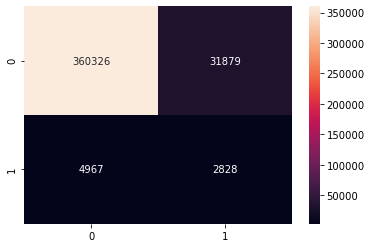

In [104]:
sns.heatmap(confusion_matrix(y_train, best_xgb.predict(X_train_selected)), annot=True, fmt='g')

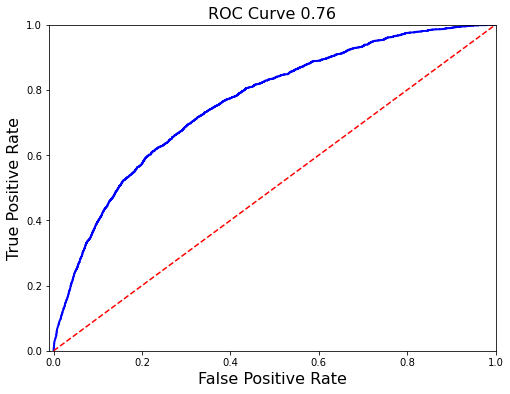

In [68]:
plot_roc_curve(best_xgb, X_test_selected, y_test)

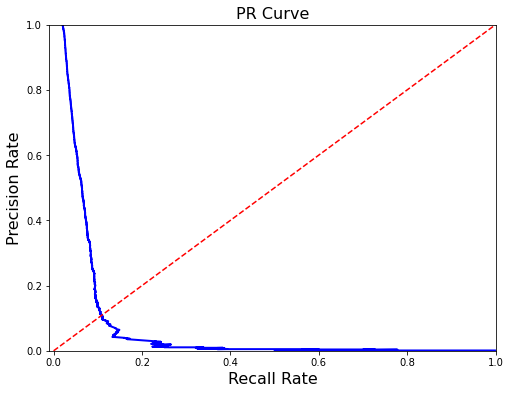

In [69]:
plot_pr_curve(best_xgb, X_test_selected, y_test)

Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

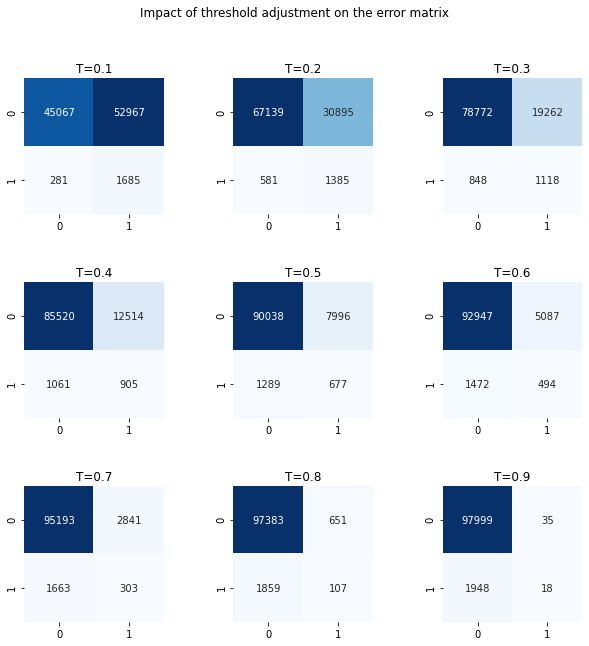

In [70]:
y_pred = best_xgb.predict_proba(X_test_selected)[:,1]
fig, axes = plt.subplots(3,3, figsize=(10,10))
for t, ax in enumerate(axes.flat):
    threshold = (t+1)/10
    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.1f" % threshold)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

Although the AUC score decreased but the f2 score improved

### Light GBM with Optuna

we will tune lightgbm with optuna. Optuna is a library for hyperparameter tuning using bayesian techniques 

In [75]:
import lightgbm as lgb

In [76]:
import optuna
def objective(trial):
    X_train,X_test,y_train,y_test = train_test_split(X_train_smote_1_selected,y_train_smote_1,test_size=0.25)
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "auc",
        "is_unbalance ":'True',
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

In [77]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-12-12 04:47:13,965] A new study created in memory with name: no-name-99978ceb-27f3-415d-9534-449ccfdcf544


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:16,800] Trial 0 finished with value: 0.95886079983682 and parameters: {'lambda_l1': 0.011925886076390306, 'lambda_l2': 6.363934375295728e-08, 'num_leaves': 171, 'feature_fraction': 0.5536488416087494, 'bagging_fraction': 0.6053678622752915, 'bagging_freq': 4, 'min_child_samples': 99}. Best is trial 0 with value: 0.95886079983682.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:19,108] Trial 1 finished with value: 0.9386609043739881 and parameters: {'lambda_l1': 1.1218050715273966, 'lambda_l2': 2.6811338356377256e-07, 'num_leaves': 28, 'feature_fraction': 0.9010751338837633, 'bagging_fraction': 0.41149431854890284, 'bagging_freq': 6, 'min_child_samples': 19}. Best is trial 0 with value: 0.95886079983682.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:21,224] Trial 2 finished with value: 0.8445455820298058 and parameters: {'lambda_l1': 9.213565340602048e-06, 'lambda_l2': 0.05901315237809294, 'num_leaves': 4, 'feature_fraction': 0.5639109719811238, 'bagging_fraction': 0.9101659401587792, 'bagging_freq': 2, 'min_child_samples': 34}. Best is trial 0 with value: 0.95886079983682.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:23,272] Trial 3 finished with value: 0.9509822669267347 and parameters: {'lambda_l1': 0.0013483327975708042, 'lambda_l2': 2.724763289315659e-07, 'num_leaves': 70, 'feature_fraction': 0.8711756631127092, 'bagging_fraction': 0.40460693768811756, 'bagging_freq': 7, 'min_child_samples': 66}. Best is trial 0 with value: 0.95886079983682.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:26,124] Trial 4 finished with value: 0.9612256345533585 and parameters: {'lambda_l1': 1.02837833843506e-06, 'lambda_l2': 3.830810636528695e-08, 'num_leaves': 213, 'feature_fraction': 0.7839362127034717, 'bagging_fraction': 0.6119390604228472, 'bagging_freq': 4, 'min_child_samples': 75}. Best is trial 4 with value: 0.9612256345533585.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:29,052] Trial 5 finished with value: 0.9594344794176515 and parameters: {'lambda_l1': 0.00026409211865223876, 'lambda_l2': 0.7176054289326712, 'num_leaves': 167, 'feature_fraction': 0.7038346451597068, 'bagging_fraction': 0.9472059478580191, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 4 with value: 0.9612256345533585.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:31,470] Trial 6 finished with value: 0.9536020703458651 and parameters: {'lambda_l1': 1.108257654265926, 'lambda_l2': 5.882588060814583e-08, 'num_leaves': 107, 'feature_fraction': 0.7512130525066065, 'bagging_fraction': 0.815806004021867, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 4 with value: 0.9612256345533585.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:34,247] Trial 7 finished with value: 0.956572455731059 and parameters: {'lambda_l1': 3.291455071149072e-07, 'lambda_l2': 1.4980746815896415e-08, 'num_leaves': 151, 'feature_fraction': 0.443288612619564, 'bagging_fraction': 0.9520484361415151, 'bagging_freq': 3, 'min_child_samples': 98}. Best is trial 4 with value: 0.9612256345533585.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:36,435] Trial 8 finished with value: 0.9514157137211408 and parameters: {'lambda_l1': 1.0738168825287684e-05, 'lambda_l2': 0.30739993799348364, 'num_leaves': 85, 'feature_fraction': 0.5611282820779051, 'bagging_fraction': 0.4433804449205776, 'bagging_freq': 4, 'min_child_samples': 93}. Best is trial 4 with value: 0.9612256345533585.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:39,747] Trial 9 finished with value: 0.9624112390204103 and parameters: {'lambda_l1': 0.00040472921741871627, 'lambda_l2': 1.623904405818253, 'num_leaves': 254, 'feature_fraction': 0.8675881049316996, 'bagging_fraction': 0.6403305885874366, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 9 with value: 0.9624112390204103.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:43,347] Trial 10 finished with value: 0.9618885531800971 and parameters: {'lambda_l1': 0.023523097907323813, 'lambda_l2': 0.0014793856293050353, 'num_leaves': 246, 'feature_fraction': 0.9203725446526809, 'bagging_fraction': 0.6997156727965392, 'bagging_freq': 6, 'min_child_samples': 41}. Best is trial 9 with value: 0.9624112390204103.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:46,526] Trial 11 finished with value: 0.9626343366351781 and parameters: {'lambda_l1': 0.021201904551848016, 'lambda_l2': 0.000993661983205785, 'num_leaves': 256, 'feature_fraction': 0.9886659734762022, 'bagging_fraction': 0.7363567801845725, 'bagging_freq': 6, 'min_child_samples': 41}. Best is trial 11 with value: 0.9626343366351781.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:49,750] Trial 12 finished with value: 0.9635904692698971 and parameters: {'lambda_l1': 1.4112685382884997e-08, 'lambda_l2': 7.793084819513229e-05, 'num_leaves': 249, 'feature_fraction': 0.9737498653579578, 'bagging_fraction': 0.7694599094370775, 'bagging_freq': 6, 'min_child_samples': 7}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:52,851] Trial 13 finished with value: 0.9617419461761069 and parameters: {'lambda_l1': 5.467861931040378e-08, 'lambda_l2': 6.280415344522203e-05, 'num_leaves': 223, 'feature_fraction': 0.9911279463013031, 'bagging_fraction': 0.7977283863383728, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:56,408] Trial 14 finished with value: 0.9610216595912852 and parameters: {'lambda_l1': 1.3054501236132875e-08, 'lambda_l2': 2.336692764367593e-05, 'num_leaves': 202, 'feature_fraction': 0.9696500865521143, 'bagging_fraction': 0.8025471541212021, 'bagging_freq': 6, 'min_child_samples': 32}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:47:59,237] Trial 15 finished with value: 0.9609706658507668 and parameters: {'lambda_l1': 0.06308907730011679, 'lambda_l2': 0.0035158342609333424, 'num_leaves': 195, 'feature_fraction': 0.8158727190659489, 'bagging_fraction': 0.7293150994218286, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:02,116] Trial 16 finished with value: 0.9590201552759399 and parameters: {'lambda_l1': 8.334582088748434, 'lambda_l2': 3.657970109355309e-06, 'num_leaves': 236, 'feature_fraction': 0.9693304567780401, 'bagging_fraction': 0.5552585572268962, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:04,689] Trial 17 finished with value: 0.9565469588607999 and parameters: {'lambda_l1': 2.6179614890798263e-05, 'lambda_l2': 0.018931573472845204, 'num_leaves': 128, 'feature_fraction': 0.6413072013819044, 'bagging_fraction': 0.7492030442933968, 'bagging_freq': 5, 'min_child_samples': 26}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:07,987] Trial 18 finished with value: 0.9631124029525375 and parameters: {'lambda_l1': 0.004299069733001423, 'lambda_l2': 0.00027796220400271027, 'num_leaves': 256, 'feature_fraction': 0.8402741835870207, 'bagging_fraction': 0.868708884043894, 'bagging_freq': 7, 'min_child_samples': 7}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:10,906] Trial 19 finished with value: 0.9603013730064635 and parameters: {'lambda_l1': 0.00011022248160993035, 'lambda_l2': 6.584106522935442e-05, 'num_leaves': 189, 'feature_fraction': 0.8340400940289991, 'bagging_fraction': 0.8778993536805345, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:14,022] Trial 20 finished with value: 0.9617419461761069 and parameters: {'lambda_l1': 0.0027142717912885094, 'lambda_l2': 4.419890636370434e-06, 'num_leaves': 223, 'feature_fraction': 0.7263818368781467, 'bagging_fraction': 0.8642112844611427, 'bagging_freq': 7, 'min_child_samples': 21}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:17,152] Trial 21 finished with value: 0.9630614092120192 and parameters: {'lambda_l1': 0.1625424220296169, 'lambda_l2': 0.00042099002573865745, 'num_leaves': 254, 'feature_fraction': 0.9516084570102323, 'bagging_fraction': 0.6896454304026656, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:20,215] Trial 22 finished with value: 0.9619650437908747 and parameters: {'lambda_l1': 0.2051861616968214, 'lambda_l2': 0.00022571275495130474, 'num_leaves': 231, 'feature_fraction': 0.9243143399966987, 'bagging_fraction': 0.6593212461982959, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:23,105] Trial 23 finished with value: 0.962079779707041 and parameters: {'lambda_l1': 0.0027200561526743152, 'lambda_l2': 0.009041614109159287, 'num_leaves': 255, 'feature_fraction': 0.9382109661325426, 'bagging_fraction': 0.5251100885696058, 'bagging_freq': 7, 'min_child_samples': 14}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:27,994] Trial 24 finished with value: 0.9596002090743361 and parameters: {'lambda_l1': 0.3537088494366073, 'lambda_l2': 8.913547154058959, 'num_leaves': 210, 'feature_fraction': 0.8564409095193635, 'bagging_fraction': 0.8357190740365794, 'bagging_freq': 5, 'min_child_samples': 26}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:31,085] Trial 25 finished with value: 0.9571652579645848 and parameters: {'lambda_l1': 9.044569048874108, 'lambda_l2': 0.0003269145756189186, 'num_leaves': 181, 'feature_fraction': 0.8066861941754806, 'bagging_fraction': 0.9959604218186292, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:34,203] Trial 26 finished with value: 0.9620287859665226 and parameters: {'lambda_l1': 6.350006198309611e-07, 'lambda_l2': 1.6329721266160396e-05, 'num_leaves': 231, 'feature_fraction': 0.899168801796552, 'bagging_fraction': 0.7722214620023635, 'bagging_freq': 7, 'min_child_samples': 13}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:37,112] Trial 27 finished with value: 0.9580703968587856 and parameters: {'lambda_l1': 0.006050504302216652, 'lambda_l2': 2.1823856473167062e-06, 'num_leaves': 144, 'feature_fraction': 0.953325653298957, 'bagging_fraction': 0.6890238805065679, 'bagging_freq': 5, 'min_child_samples': 24}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:40,693] Trial 28 finished with value: 0.9629657959485474 and parameters: {'lambda_l1': 0.07909693803404212, 'lambda_l2': 0.00039656511878142077, 'num_leaves': 235, 'feature_fraction': 0.7609987242482223, 'bagging_fraction': 0.8715974791018023, 'bagging_freq': 6, 'min_child_samples': 32}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:43,615] Trial 29 finished with value: 0.9596766996851136 and parameters: {'lambda_l1': 7.719955172942513e-05, 'lambda_l2': 0.03972716309338738, 'num_leaves': 173, 'feature_fraction': 0.8801143226512367, 'bagging_fraction': 0.7626450407057379, 'bagging_freq': 7, 'min_child_samples': 83}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:46,317] Trial 30 finished with value: 0.960530844838796 and parameters: {'lambda_l1': 2.7974952246165243e-06, 'lambda_l2': 9.47659991292987e-05, 'num_leaves': 209, 'feature_fraction': 0.4505581586359677, 'bagging_fraction': 0.5415007522181394, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:49,560] Trial 31 finished with value: 0.9615315969964687 and parameters: {'lambda_l1': 0.07423371911757297, 'lambda_l2': 0.00042208192552581786, 'num_leaves': 240, 'feature_fraction': 0.6580663987955753, 'bagging_fraction': 0.8636592732848917, 'bagging_freq': 6, 'min_child_samples': 31}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:53,241] Trial 32 finished with value: 0.9627681952040387 and parameters: {'lambda_l1': 1.2761655316349703, 'lambda_l2': 0.0024019409891228643, 'num_leaves': 241, 'feature_fraction': 0.7715744855883984, 'bagging_fraction': 0.9212159512355553, 'bagging_freq': 6, 'min_child_samples': 9}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:57,595] Trial 33 finished with value: 0.9617546946112364 and parameters: {'lambda_l1': 0.09686887069971471, 'lambda_l2': 1.258367873256256e-05, 'num_leaves': 223, 'feature_fraction': 0.6824543294874594, 'bagging_fraction': 0.8869796783128868, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:48:59,658] Trial 34 finished with value: 0.9483178439846509 and parameters: {'lambda_l1': 0.015048356538879292, 'lambda_l2': 4.288831255642598e-07, 'num_leaves': 56, 'feature_fraction': 0.6171562110818696, 'bagging_fraction': 0.8235517019737961, 'bagging_freq': 6, 'min_child_samples': 20}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:02,832] Trial 35 finished with value: 0.9621817671880777 and parameters: {'lambda_l1': 0.0005712781660793487, 'lambda_l2': 0.00625606293300089, 'num_leaves': 242, 'feature_fraction': 0.8449713328532791, 'bagging_fraction': 0.8459433884631089, 'bagging_freq': 7, 'min_child_samples': 11}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:04,347] Trial 36 finished with value: 0.9152547774760648 and parameters: {'lambda_l1': 0.5063349699999149, 'lambda_l2': 0.0005954045506660977, 'num_leaves': 13, 'feature_fraction': 0.9050015628208002, 'bagging_fraction': 0.9127124843023643, 'bagging_freq': 5, 'min_child_samples': 35}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:07,533] Trial 37 finished with value: 0.9613212478168305 and parameters: {'lambda_l1': 2.2424198589154303, 'lambda_l2': 0.0001527377721492565, 'num_leaves': 220, 'feature_fraction': 0.7421872014428592, 'bagging_fraction': 0.7842773286624493, 'bagging_freq': 7, 'min_child_samples': 54}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:10,585] Trial 38 finished with value: 0.9599762879106589 and parameters: {'lambda_l1': 0.007416395374204041, 'lambda_l2': 3.0194988736432967e-05, 'num_leaves': 198, 'feature_fraction': 0.7975154318793998, 'bagging_fraction': 0.997384121188103, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:13,194] Trial 39 finished with value: 0.9572353743577976 and parameters: {'lambda_l1': 0.046215678199029296, 'lambda_l2': 0.0013053390012806197, 'num_leaves': 159, 'feature_fraction': 0.4981443620428502, 'bagging_fraction': 0.5832731922841312, 'bagging_freq': 4, 'min_child_samples': 27}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:16,386] Trial 40 finished with value: 0.9627809436391683 and parameters: {'lambda_l1': 0.0010143741336969291, 'lambda_l2': 7.450210269340291e-07, 'num_leaves': 253, 'feature_fraction': 0.7682823136894554, 'bagging_fraction': 0.6674801697411799, 'bagging_freq': 6, 'min_child_samples': 38}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:19,712] Trial 41 finished with value: 0.9616399586950701 and parameters: {'lambda_l1': 0.0014295425974674145, 'lambda_l2': 6.617161505744027e-07, 'num_leaves': 248, 'feature_fraction': 0.7665296972686677, 'bagging_fraction': 0.6170092056607526, 'bagging_freq': 6, 'min_child_samples': 39}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:22,872] Trial 42 finished with value: 0.9622136382759017 and parameters: {'lambda_l1': 0.0047370212231841215, 'lambda_l2': 1.6307957531139117e-07, 'num_leaves': 233, 'feature_fraction': 0.712047388608413, 'bagging_fraction': 0.6859836591847228, 'bagging_freq': 6, 'min_child_samples': 57}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:26,095] Trial 43 finished with value: 0.9630486607768897 and parameters: {'lambda_l1': 0.0005941340575437484, 'lambda_l2': 1.0260414737400653e-08, 'num_leaves': 256, 'feature_fraction': 0.8894358439676572, 'bagging_fraction': 0.7223259091631367, 'bagging_freq': 7, 'min_child_samples': 48}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:29,943] Trial 44 finished with value: 0.9611236470723219 and parameters: {'lambda_l1': 6.178176163440971e-05, 'lambda_l2': 0.31484212613755563, 'num_leaves': 211, 'feature_fraction': 0.8889622270430556, 'bagging_fraction': 0.9516918420901818, 'bagging_freq': 7, 'min_child_samples': 63}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:32,964] Trial 45 finished with value: 0.9553677286113129 and parameters: {'lambda_l1': 4.318591647464567e-06, 'lambda_l2': 1.960393691977634e-08, 'num_leaves': 103, 'feature_fraction': 0.9393905779193902, 'bagging_fraction': 0.7203964807097032, 'bagging_freq': 7, 'min_child_samples': 49}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:36,295] Trial 46 finished with value: 0.9627235756810851 and parameters: {'lambda_l1': 0.0003406936048204062, 'lambda_l2': 0.06748261576711995, 'num_leaves': 245, 'feature_fraction': 0.9972148825495075, 'bagging_fraction': 0.718671621793958, 'bagging_freq': 7, 'min_child_samples': 9}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:39,721] Trial 47 finished with value: 0.9613148735992657 and parameters: {'lambda_l1': 1.1520749791940594e-07, 'lambda_l2': 0.0007824573465035325, 'num_leaves': 254, 'feature_fraction': 0.8269220515730432, 'bagging_fraction': 0.6344761540785506, 'bagging_freq': 7, 'min_child_samples': 68}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:43,670] Trial 48 finished with value: 0.962047908619217 and parameters: {'lambda_l1': 0.02462871950856705, 'lambda_l2': 9.041198169864982e-08, 'num_leaves': 230, 'feature_fraction': 0.9590214712583164, 'bagging_fraction': 0.8009974173118221, 'bagging_freq': 2, 'min_child_samples': 77}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:46,820] Trial 49 finished with value: 0.961397738427608 and parameters: {'lambda_l1': 0.1617153376258023, 'lambda_l2': 0.0033549878748297315, 'num_leaves': 216, 'feature_fraction': 0.8592418348422156, 'bagging_fraction': 0.758109896663618, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:48,760] Trial 50 finished with value: 0.9452454711184202 and parameters: {'lambda_l1': 2.235655983643306e-05, 'lambda_l2': 6.76998303350013e-06, 'num_leaves': 46, 'feature_fraction': 0.9201720375546198, 'bagging_fraction': 0.8201361673298955, 'bagging_freq': 6, 'min_child_samples': 22}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:51,916] Trial 51 finished with value: 0.9628956795553346 and parameters: {'lambda_l1': 0.0011193276486407007, 'lambda_l2': 1.2659020928633305e-06, 'num_leaves': 255, 'feature_fraction': 0.7966608259806672, 'bagging_fraction': 0.6741328108127793, 'bagging_freq': 6, 'min_child_samples': 38}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:55,098] Trial 52 finished with value: 0.9623666194974567 and parameters: {'lambda_l1': 0.00020228865389289744, 'lambda_l2': 1.7596875024467904e-06, 'num_leaves': 242, 'feature_fraction': 0.7998916871294554, 'bagging_fraction': 0.6661624662235176, 'bagging_freq': 6, 'min_child_samples': 29}. Best is trial 12 with value: 0.9635904692698971.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:49:58,512] Trial 53 finished with value: 0.9637498247090169 and parameters: {'lambda_l1': 0.00109030836866613, 'lambda_l2': 4.6990889744943706e-05, 'num_leaves': 255, 'feature_fraction': 0.8747075522206045, 'bagging_fraction': 0.7108018770409114, 'bagging_freq': 7, 'min_child_samples': 43}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:01,480] Trial 54 finished with value: 0.961614461824811 and parameters: {'lambda_l1': 0.0114841146808368, 'lambda_l2': 3.55625881896908e-05, 'num_leaves': 230, 'feature_fraction': 0.9070232691749233, 'bagging_fraction': 0.7113697284648458, 'bagging_freq': 7, 'min_child_samples': 44}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:04,624] Trial 55 finished with value: 0.962513226501447 and parameters: {'lambda_l1': 0.0024449442688622577, 'lambda_l2': 0.0001538469191173067, 'num_leaves': 244, 'feature_fraction': 0.8740168246443029, 'bagging_fraction': 0.73518986124639, 'bagging_freq': 7, 'min_child_samples': 49}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:13,940] Trial 56 finished with value: 0.9611746408128402 and parameters: {'lambda_l1': 0.037620610879215276, 'lambda_l2': 8.40129911890266e-05, 'num_leaves': 202, 'feature_fraction': 0.9404343920439474, 'bagging_fraction': 0.893349114941619, 'bagging_freq': 7, 'min_child_samples': 8}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:17,181] Trial 57 finished with value: 0.9628574342499459 and parameters: {'lambda_l1': 0.00017724422378999363, 'lambda_l2': 9.101788321176573e-06, 'num_leaves': 256, 'feature_fraction': 0.9839569423788559, 'bagging_fraction': 0.7819985323589028, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:31,859] Trial 58 finished with value: 0.9600591527390013 and parameters: {'lambda_l1': 0.0006005957066839754, 'lambda_l2': 4.832923269490587e-05, 'num_leaves': 188, 'feature_fraction': 0.8386661846567498, 'bagging_fraction': 0.642565983558966, 'bagging_freq': 4, 'min_child_samples': 62}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:35,249] Trial 59 finished with value: 0.9617738172639309 and parameters: {'lambda_l1': 3.335816666788071e-05, 'lambda_l2': 0.0001808208761829091, 'num_leaves': 224, 'feature_fraction': 0.8823898554700549, 'bagging_fraction': 0.444021816696112, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:40,315] Trial 60 finished with value: 0.962328374192068 and parameters: {'lambda_l1': 0.20153746272908743, 'lambda_l2': 0.010298199653562936, 'num_leaves': 247, 'feature_fraction': 0.9794031165055316, 'bagging_fraction': 0.7407450044133739, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:44,260] Trial 61 finished with value: 0.9632016419984447 and parameters: {'lambda_l1': 0.0010591641869806918, 'lambda_l2': 2.9277344374768955e-08, 'num_leaves': 256, 'feature_fraction': 0.8211013680059948, 'bagging_fraction': 0.6918525163075196, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:47,414] Trial 62 finished with value: 0.9619714180084394 and parameters: {'lambda_l1': 0.0036647034510375602, 'lambda_l2': 1.479003018925551e-08, 'num_leaves': 236, 'feature_fraction': 0.8250156274031686, 'bagging_fraction': 0.6885148775649074, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:50,520] Trial 63 finished with value: 0.9618375594395788 and parameters: {'lambda_l1': 0.0018266215618012677, 'lambda_l2': 4.514717757909567e-08, 'num_leaves': 236, 'feature_fraction': 0.9216007391887036, 'bagging_fraction': 0.7060811389215178, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:54,012] Trial 64 finished with value: 0.9626853303756964 and parameters: {'lambda_l1': 0.010440453192608497, 'lambda_l2': 1.0009678054889732e-08, 'num_leaves': 249, 'feature_fraction': 0.8560957416763528, 'bagging_fraction': 0.9305654340636738, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:50:57,759] Trial 65 finished with value: 0.9618120625693196 and parameters: {'lambda_l1': 1.1305140511831276e-08, 'lambda_l2': 0.0003184695024315899, 'num_leaves': 227, 'feature_fraction': 0.9589095410287748, 'bagging_fraction': 0.7485825483395412, 'bagging_freq': 5, 'min_child_samples': 7}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:00,533] Trial 66 finished with value: 0.9558202980584133 and parameters: {'lambda_l1': 4.108071391127103, 'lambda_l2': 1.074622686211886e-07, 'num_leaves': 125, 'feature_fraction': 0.8969103514108161, 'bagging_fraction': 0.8562182781489713, 'bagging_freq': 7, 'min_child_samples': 12}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:03,527] Trial 67 finished with value: 0.9611555181601459 and parameters: {'lambda_l1': 0.6329567808912646, 'lambda_l2': 3.0394441596905844e-08, 'num_leaves': 238, 'feature_fraction': 0.7346789974754395, 'bagging_fraction': 0.646523415499326, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:06,382] Trial 68 finished with value: 0.9615634680842926 and parameters: {'lambda_l1': 0.00012267948232285204, 'lambda_l2': 0.0005951181463570008, 'num_leaves': 217, 'feature_fraction': 0.815327384782871, 'bagging_fraction': 0.599708938978553, 'bagging_freq': 7, 'min_child_samples': 18}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:09,398] Trial 69 finished with value: 0.9615698423018575 and parameters: {'lambda_l1': 0.0008943083042718621, 'lambda_l2': 0.0023271348462836354, 'num_leaves': 247, 'feature_fraction': 0.7844069034470056, 'bagging_fraction': 0.6983192423063619, 'bagging_freq': 6, 'min_child_samples': 42}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:12,747] Trial 70 finished with value: 0.9631378998227967 and parameters: {'lambda_l1': 5.646125648995052e-08, 'lambda_l2': 9.96813171258296e-05, 'num_leaves': 256, 'feature_fraction': 0.8672333470922792, 'bagging_fraction': 0.9714222972882911, 'bagging_freq': 5, 'min_child_samples': 58}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:16,122] Trial 71 finished with value: 0.9621817671880777 and parameters: {'lambda_l1': 1.1391508461745003e-07, 'lambda_l2': 0.00012178233918418812, 'num_leaves': 255, 'feature_fraction': 0.8660417591885854, 'bagging_fraction': 0.9810641742429995, 'bagging_freq': 5, 'min_child_samples': 58}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:19,451] Trial 72 finished with value: 0.9626917045932611 and parameters: {'lambda_l1': 2.4423733676470113e-08, 'lambda_l2': 2.0795078919378492e-05, 'num_leaves': 248, 'feature_fraction': 0.8398636332358926, 'bagging_fraction': 0.975842844108324, 'bagging_freq': 5, 'min_child_samples': 72}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:22,711] Trial 73 finished with value: 0.96303591234176 and parameters: {'lambda_l1': 7.72249780571537e-08, 'lambda_l2': 0.00028203694300310745, 'num_leaves': 236, 'feature_fraction': 0.9137896902895547, 'bagging_fraction': 0.9007051321451093, 'bagging_freq': 6, 'min_child_samples': 63}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:26,015] Trial 74 finished with value: 0.9624749811960582 and parameters: {'lambda_l1': 6.738080259419529e-08, 'lambda_l2': 7.122519511223374e-05, 'num_leaves': 240, 'feature_fraction': 0.9322991609271715, 'bagging_fraction': 0.8942970867813188, 'bagging_freq': 6, 'min_child_samples': 61}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:29,561] Trial 75 finished with value: 0.9620096633138282 and parameters: {'lambda_l1': 2.905767681087432e-07, 'lambda_l2': 0.00022435708733955682, 'num_leaves': 256, 'feature_fraction': 0.9700996023222055, 'bagging_fraction': 0.9330337566532632, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:32,856] Trial 76 finished with value: 0.962200889840772 and parameters: {'lambda_l1': 2.8803590744438228e-08, 'lambda_l2': 0.0012642954459077351, 'num_leaves': 226, 'feature_fraction': 0.9129385113685595, 'bagging_fraction': 0.9620654000205268, 'bagging_freq': 6, 'min_child_samples': 91}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:36,020] Trial 77 finished with value: 0.9603587409645467 and parameters: {'lambda_l1': 2.686856281304554e-08, 'lambda_l2': 3.900025031570874e-06, 'num_leaves': 207, 'feature_fraction': 0.9498597734953294, 'bagging_fraction': 0.76500723988374, 'bagging_freq': 7, 'min_child_samples': 57}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:39,282] Trial 78 finished with value: 0.9623538710623271 and parameters: {'lambda_l1': 3.269553425962124e-07, 'lambda_l2': 3.841087605015483e-05, 'num_leaves': 249, 'feature_fraction': 0.9009288059655265, 'bagging_fraction': 0.8350827103280206, 'bagging_freq': 6, 'min_child_samples': 55}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:44,368] Trial 79 finished with value: 0.9621562703178185 and parameters: {'lambda_l1': 8.437954175068921e-07, 'lambda_l2': 0.0004053198154644996, 'num_leaves': 235, 'feature_fraction': 0.8810236082512913, 'bagging_fraction': 0.9049307186401196, 'bagging_freq': 7, 'min_child_samples': 73}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:47,580] Trial 80 finished with value: 0.9609897885034612 and parameters: {'lambda_l1': 2.065655384463541e-06, 'lambda_l2': 3.1216482336342656e-07, 'num_leaves': 219, 'feature_fraction': 0.8512996892852881, 'bagging_fraction': 0.7854923371044072, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:50,773] Trial 81 finished with value: 0.9616590813477646 and parameters: {'lambda_l1': 0.0005163122352688619, 'lambda_l2': 0.0007201990138790999, 'num_leaves': 243, 'feature_fraction': 0.8735157513721696, 'bagging_fraction': 0.8657031816863898, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:53,935] Trial 82 finished with value: 0.9623411226271975 and parameters: {'lambda_l1': 6.406499354136671e-08, 'lambda_l2': 0.0018628218150571142, 'num_leaves': 235, 'feature_fraction': 0.8172423833229358, 'bagging_fraction': 0.882766075240803, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:51:57,654] Trial 83 finished with value: 0.9627044530283908 and parameters: {'lambda_l1': 1.5291210449149327e-07, 'lambda_l2': 0.00025009060402834856, 'num_leaves': 250, 'feature_fraction': 0.7549808050672037, 'bagging_fraction': 0.7243299937796875, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:01,392] Trial 84 finished with value: 0.9617610688288013 and parameters: {'lambda_l1': 0.1116220032741917, 'lambda_l2': 0.00011316939092384003, 'num_leaves': 240, 'feature_fraction': 0.7839385268818678, 'bagging_fraction': 0.8106546833350277, 'bagging_freq': 7, 'min_child_samples': 40}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:04,515] Trial 85 finished with value: 0.9617993141341901 and parameters: {'lambda_l1': 1.966172032720408e-08, 'lambda_l2': 0.004403203653784514, 'num_leaves': 230, 'feature_fraction': 0.8869627512269952, 'bagging_fraction': 0.8469347008380519, 'bagging_freq': 6, 'min_child_samples': 11}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:08,114] Trial 86 finished with value: 0.9621753929705129 and parameters: {'lambda_l1': 4.3939693263004306e-08, 'lambda_l2': 0.00040816356123409724, 'num_leaves': 256, 'feature_fraction': 0.9176224427053038, 'bagging_fraction': 0.945597887907947, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:11,414] Trial 87 finished with value: 0.9625450975892709 and parameters: {'lambda_l1': 0.0003216856551795641, 'lambda_l2': 1.4994942197288369e-05, 'num_leaves': 249, 'feature_fraction': 0.9362530770339967, 'bagging_fraction': 0.8742456252392896, 'bagging_freq': 7, 'min_child_samples': 34}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:14,454] Trial 88 finished with value: 0.9574329751023062 and parameters: {'lambda_l1': 0.004015288923047352, 'lambda_l2': 4.414088821969846, 'num_leaves': 143, 'feature_fraction': 0.8628044803758044, 'bagging_fraction': 0.6796146329489553, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:17,488] Trial 89 finished with value: 0.9617801914814956 and parameters: {'lambda_l1': 0.006158993582863276, 'lambda_l2': 0.0010401293507306035, 'num_leaves': 241, 'feature_fraction': 0.8403001409273201, 'bagging_fraction': 0.6224055123068254, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:20,926] Trial 90 finished with value: 0.9606710776252215 and parameters: {'lambda_l1': 0.3629499472860706, 'lambda_l2': 5.907736816507569e-05, 'num_leaves': 225, 'feature_fraction': 0.5847442454032117, 'bagging_fraction': 0.9122370996191428, 'bagging_freq': 6, 'min_child_samples': 52}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:24,188] Trial 91 finished with value: 0.9620542828367817 and parameters: {'lambda_l1': 0.000962570542983488, 'lambda_l2': 1.3893232901851298e-06, 'num_leaves': 251, 'feature_fraction': 0.7886508147549042, 'bagging_fraction': 0.6674302296908121, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:27,500] Trial 92 finished with value: 0.9625769686770949 and parameters: {'lambda_l1': 0.002537818915090786, 'lambda_l2': 3.329335188261033e-08, 'num_leaves': 256, 'feature_fraction': 0.7529808287425163, 'bagging_fraction': 0.7026968071355288, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:29,971] Trial 93 finished with value: 0.9534363406891804 and parameters: {'lambda_l1': 0.019027023430436857, 'lambda_l2': 1.7328015262056487e-07, 'num_leaves': 91, 'feature_fraction': 0.8065579885723497, 'bagging_fraction': 0.7256927648932694, 'bagging_freq': 6, 'min_child_samples': 30}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:33,079] Trial 94 finished with value: 0.9617164493058477 and parameters: {'lambda_l1': 0.0017162651977575842, 'lambda_l2': 2.0273368781982386e-08, 'num_leaves': 244, 'feature_fraction': 0.8260335761803277, 'bagging_fraction': 0.6759570622487918, 'bagging_freq': 7, 'min_child_samples': 41}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:36,411] Trial 95 finished with value: 0.9617483203936716 and parameters: {'lambda_l1': 0.036705244125465615, 'lambda_l2': 2.5690974385228447e-05, 'num_leaves': 230, 'feature_fraction': 0.770052133206862, 'bagging_fraction': 0.7410029149854734, 'bagging_freq': 6, 'min_child_samples': 46}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:39,677] Trial 96 finished with value: 0.9626343366351781 and parameters: {'lambda_l1': 0.0008020120500500175, 'lambda_l2': 0.00016379920628517658, 'num_leaves': 251, 'feature_fraction': 0.6847688819719066, 'bagging_fraction': 0.6525899022042202, 'bagging_freq': 7, 'min_child_samples': 7}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:43,370] Trial 97 finished with value: 0.9624686069784933 and parameters: {'lambda_l1': 0.000211964081569887, 'lambda_l2': 6.995133939514056e-06, 'num_leaves': 236, 'feature_fraction': 0.7167821602675547, 'bagging_fraction': 0.6935063548236966, 'bagging_freq': 5, 'min_child_samples': 34}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:47,436] Trial 98 finished with value: 0.9621817671880777 and parameters: {'lambda_l1': 0.0001092344699398974, 'lambda_l2': 6.928965655566268e-08, 'num_leaves': 244, 'feature_fraction': 0.9725168226049399, 'bagging_fraction': 0.7101155174678242, 'bagging_freq': 6, 'min_child_samples': 22}. Best is trial 53 with value: 0.9637498247090169.


[LightGBM] [Warning] Unknown parameter: True


[I 2021-12-12 04:52:51,834] Trial 99 finished with value: 0.961831185222014 and parameters: {'lambda_l1': 0.007941422802680936, 'lambda_l2': 0.0005366834097128772, 'num_leaves': 251, 'feature_fraction': 0.8908996317095703, 'bagging_fraction': 0.7581757934520728, 'bagging_freq': 7, 'min_child_samples': 24}. Best is trial 53 with value: 0.9637498247090169.


In [78]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9637498247090169
  Params: 
    lambda_l1: 0.00109030836866613
    lambda_l2: 4.6990889744943706e-05
    num_leaves: 255
    feature_fraction: 0.8747075522206045
    bagging_fraction: 0.7108018770409114
    bagging_freq: 7
    min_child_samples: 43


In [280]:
best_lgbm_optuna= lgb.LGBMClassifier(objective='binary', is_unbalance= 'True', metric='auc', boosting_type='gbdt', lambda_l1=0.00109030836866613,
                                  lambda_l2= 4.6990889744943706e-05, num_leaves=225, feature_fraction=0.8747075522206045, bagging_fraction=0.7108018770409114,
                                     bagging_freq=7, min_child_samples=43)

In [281]:
best_lgbm_optuna.fit(X_train_smote_1_selected, y_train_smote_1)

[LightGBM] [Warning] feature_fraction is set=0.8747075522206045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8747075522206045
[LightGBM] [Warning] lambda_l1 is set=0.00109030836866613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00109030836866613
[LightGBM] [Warning] bagging_fraction is set=0.7108018770409114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7108018770409114
[LightGBM] [Warning] lambda_l2 is set=4.6990889744943706e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6990889744943706e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


LGBMClassifier(bagging_fraction=0.7108018770409114, bagging_freq=7,
               feature_fraction=0.8747075522206045, is_unbalance='True',
               lambda_l1=0.00109030836866613, lambda_l2=4.6990889744943706e-05,
               metric='auc', min_child_samples=43, num_leaves=225,
               objective='binary')

In [283]:
print_results("Base Model Result(LGBM) Train", y_train, best_lgbm_optuna.predict(X_train_selected))

Base Model Result(LGBM) Train
accuracy: 0.94626
precision: 0.10458874458874459
recall: 0.23245670301475305
f2: 0.1867848675394289


In [282]:
print_results("Base Model Result(LGBM) Test", y_test, best_lgbm_optuna.predict(X_test_selected))

Base Model Result(LGBM) Test
accuracy: 0.94308
precision: 0.0760127446517979
recall: 0.1698880976602238
f2: 0.13623755914504815


Our result certainly improved with optuna when we compare to last LGBM run but not the best

### Neural network

#### Part 1

We will first fit neural network on balanced smote dataset. We will create three layer neural network, [input-hiddhen-output] then we will use accuracy metric and adam optimizer to fit model

In [82]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [83]:
classifier = Sequential()

In [85]:
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train_smote_1_selected.shape[1]))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [86]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
classifier.fit(X_train_smote_1_selected, y_train_smote_1, batch_size = 32, epochs = 100)

Epoch 1/100
19611/19611 [==============================] - 20s 985us/step - loss: 0.4498 - accuracy: 0.7873
Epoch 2/100
19611/19611 [==============================] - 19s 974us/step - loss: 0.4252 - accuracy: 0.8012
Epoch 3/100
19611/19611 [==============================] - 19s 975us/step - loss: 0.4100 - accuracy: 0.8103
Epoch 4/100
19611/19611 [==============================] - 19s 989us/step - loss: 0.4002 - accuracy: 0.8157
Epoch 5/100
19611/19611 [==============================] - 19s 978us/step - loss: 0.3924 - accuracy: 0.8207
Epoch 6/100
19611/19611 [==============================] - 19s 970us/step - loss: 0.3808 - accuracy: 0.8260
Epoch 7/100
19611/19611 [==============================] - 20s 1ms/step - loss: 0.3704 - accuracy: 0.8303
Epoch 8/100
19611/19611 [==============================] - 20s 1ms/step - loss: 0.3663 - accuracy: 0.8327
Epoch 9/100
19611/19611 [==============================] - 20s 1ms/step - loss: 0.3639 - accuracy: 0.8337
Epoch 10/100
19611/19611 [========

KeyboardInterrupt: 

In [230]:
y_pred_nn_1 = classifier.predict(X_test_selected)

In [231]:
y_pred_nn_act = (y_pred > 0.5)

In [236]:
print_results("Base Model Result(neural network)", y_test, y_pred_nn_act)

Base Model Result(neural network)
accuracy: 0.76011
precision: 0.05654222544400145
recall: 0.7141403865717192
f2: 0.2147117296222664


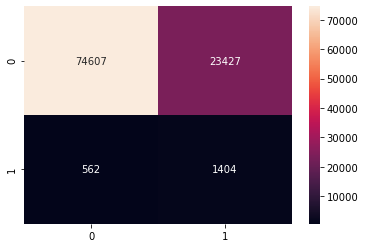

In [232]:
sns.heatmap(confusion_matrix(y_test, y_pred_nn_act), annot=True, fmt='g')

In [233]:
print(classification_report(y_test, y_pred_nn_act))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     98034
           1       0.06      0.71      0.10      1966

    accuracy                           0.76    100000
   macro avg       0.52      0.74      0.48    100000
weighted avg       0.97      0.76      0.85    100000



(-0.01, 1.0, 0.0, 1.0)

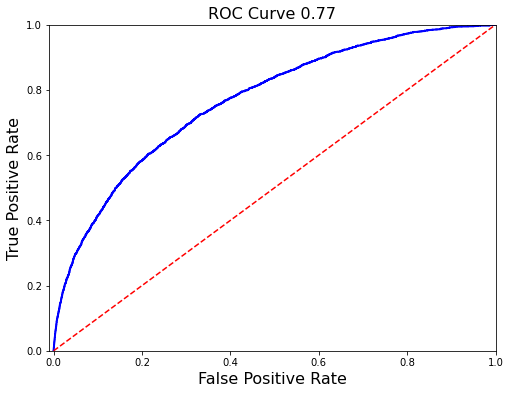

In [234]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_nn_1)
auc = sklearn.metrics.auc(log_fpr, log_tpr)
plt.figure(figsize=(8,6))
title_1= "ROC Curve "+str(round(auc,2))
plt.title(title_1, fontsize=16)
plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, label="AUC = %.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
    

The neural network performed good in terms of accuracy but lagged behind in precision

### Part 2

In second part, we will use the same approch but on unbalanced dataset. In this case we will be using initial bias in our model this bias is log(pos/neg). This bias will give better fit to our data

In [95]:
import tensorflow as tf
from tensorflow import keras

In [99]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train_selected.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [100]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [101]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                320       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [105]:
initial_bias = np.log([0.0199])
initial_bias

array([-3.91703555])

In [111]:
model = make_model(output_bias=initial_bias)
baseline_history = model.fit(
    X_train_selected,
    y_train,
    batch_size=32,
    epochs=40,
    callbacks=[early_stopping])

Epoch 1/40
12500/12500 [==============================] - 16s 1ms/step - loss: 0.0932 - tp: 56.0000 - fp: 224.0000 - tn: 391981.0000 - fn: 7739.0000 - accuracy: 0.9801 - precision: 0.2000 - recall: 0.0072 - auc: 0.7227 - prc: 0.0687
Epoch 2/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0860 - tp: 78.0000 - fp: 130.0000 - tn: 392075.0000 - fn: 7717.0000 - accuracy: 0.9804 - precision: 0.3750 - recall: 0.0100 - auc: 0.7724 - prc: 0.0906
Epoch 3/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0858 - tp: 75.0000 - fp: 155.0000 - tn: 392050.0000 - fn: 7720.0000 - accuracy: 0.9803 - precision: 0.3261 - recall: 0.0096 - auc: 0.7745 - prc: 0.0923
Epoch 4/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0854 - tp: 79.0000 - fp: 123.0000 - tn: 392082.0000 - fn: 7716.0000 - accuracy: 0.9804 - precision: 0.3911 - recall: 0.0101 - auc: 0.7790 - prc: 0.0945
Epoch 5/40
12500/12500 [==============================] - 14s 1ms/st

12500/12500 [==============================] - 14s 1ms/step - loss: 0.0849 - tp: 65.0000 - fp: 102.0000 - tn: 392103.0000 - fn: 7730.0000 - accuracy: 0.9804 - precision: 0.3892 - recall: 0.0083 - auc: 0.7831 - prc: 0.0957
Epoch 28/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0846 - tp: 78.0000 - fp: 114.0000 - tn: 392091.0000 - fn: 7717.0000 - accuracy: 0.9804 - precision: 0.4062 - recall: 0.0100 - auc: 0.7842 - prc: 0.0988
Epoch 29/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0847 - tp: 76.0000 - fp: 104.0000 - tn: 392101.0000 - fn: 7719.0000 - accuracy: 0.9804 - precision: 0.4222 - recall: 0.0097 - auc: 0.7830 - prc: 0.0993
Epoch 30/40
12500/12500 [==============================] - 14s 1ms/step - loss: 0.0848 - tp: 77.0000 - fp: 108.0000 - tn: 392097.0000 - fn: 7718.0000 - accuracy: 0.9804 - precision: 0.4162 - recall: 0.0099 - auc: 0.7834 - prc: 0.0958
Epoch 31/40
12500/12500 [==============================] - 14s 1ms/step - lo

In [237]:
y_pred_nn_2=model.predict(X_test_selected)

In [284]:
y_pred_nn_2_act = (y_pred > 0.8)

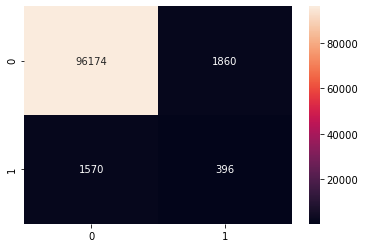

In [285]:
sns.heatmap(confusion_matrix(y_test,y_pred_nn_2_act), annot=True, fmt='g')

In [286]:
print_results("Base Model Result(Neural Network)", y_test, y_pred_nn_2_act)

Base Model Result(Neural Network)
accuracy: 0.9657
precision: 0.17553191489361702
recall: 0.20142421159715157
f2: 0.19565217391304343


(-0.01, 1.0, 0.0, 1.0)

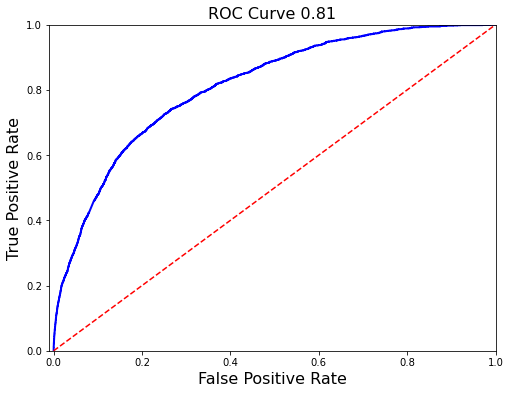

In [300]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_nn_2)
auc = sklearn.metrics.auc(log_fpr, log_tpr)
plt.figure(figsize=(8,6))
title_1= "ROC Curve "+str(round(auc,2))
plt.title(title_1, fontsize=16)
plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, label="AUC = %.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])

In [135]:
y_pred_rf= best_rf.predict(X_test_selected)

### Random Forest - undersampling and Bagging
In this technique we allow it to successively undersample majority class while fitting an estimator on top. This technique can result in better f1 score

In [219]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold


In [220]:
def rf_search(X, y, search_verbose=1):
    params = {
        "max_depth":[4,5,6],
        'min_samples_leaf': [1, 2],
         'min_samples_split': [2, 5, 10]
    }
    brf = BalancedRandomForestClassifier(n_estimators=100)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
    grid_search = GridSearchCV(estimator=brf, param_grid=params, scoring="roc_auc", n_jobs=-1, cv=cv.split(X,y), verbose=1000)
    grid_search.fit(X, y)
    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)
    return grid_search.best_params_

In [221]:
rf_search(X_train_selected, y_train)

Fitting 30 folds for each of 18 candidates, totalling 540 fits
Best estimator: 
BalancedRandomForestClassifier(max_depth=6, min_samples_leaf=2,
                               min_samples_split=5)
Parameters:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Highest AUC: 0.10


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [222]:
best_brf= BalancedRandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=2, min_samples_split=5)

In [223]:
best_brf.fit(X_train_selected, y_train)

BalancedRandomForestClassifier(max_depth=6, min_samples_leaf=2,
                               min_samples_split=5)

In [224]:
print_results("Base Model Result(Logistic Regression)", y_test, best_brf.predict(X_test_selected))

Base Model Result(Logistic Regression)
accuracy: 0.76011
precision: 0.05654222544400145
recall: 0.7141403865717192
f2: 0.2147117296222664


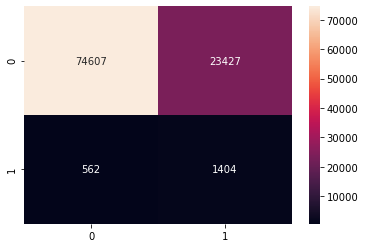

In [225]:
sns.heatmap(confusion_matrix(y_test, best_brf.predict(X_test_selected)), annot=True, fmt='g')

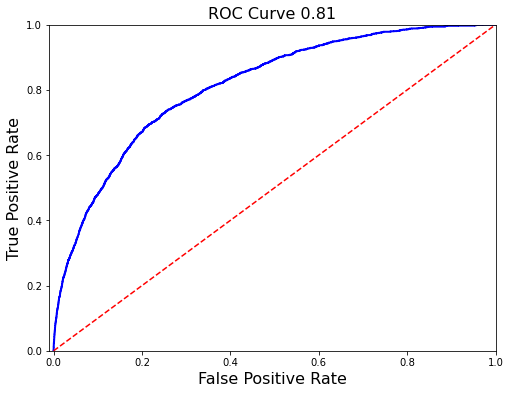

In [227]:
plot_roc_curve(best_brf, X_test_selected, y_test)

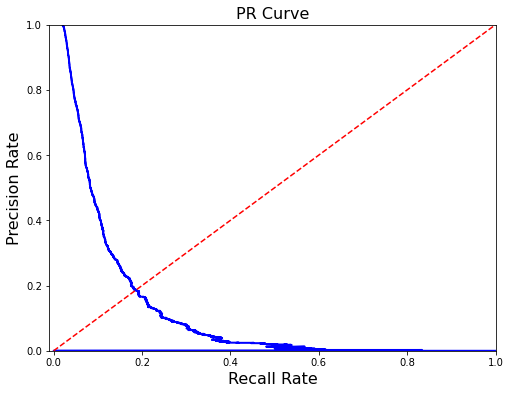

In [228]:
plot_pr_curve(best_brf, X_test_selected, y_test)

Text(0.5, 0.98, 'Impact of threshold adjustment on the error matrix')

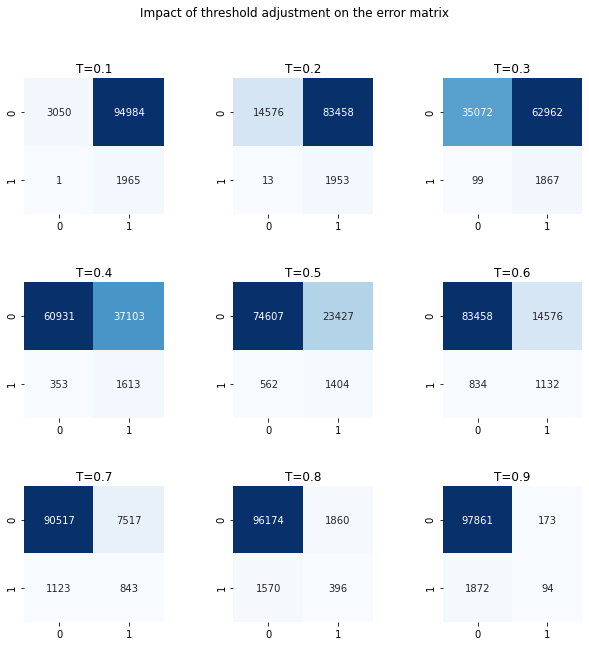

In [229]:
y_pred = best_brf.predict_proba(X_test_selected)[:,1]
fig, axes = plt.subplots(3,3, figsize=(10,10))
for t, ax in enumerate(axes.flat):
    threshold = (t+1)/10
    y_pred_int = (y_pred > threshold).astype(int)
    c_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_int)
    sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d", ax=ax, cbar=False)
    ax.title.set_text("T=%.1f" % threshold)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Impact of threshold adjustment on the error matrix")

### Voting Classifier

We will combine all the good model to ensemble the best model (hopefully)

In [253]:
from sklearn.ensemble import VotingClassifier

In [288]:
best_vote = VotingClassifier(estimators=[('lr', best_lg), ('lgbm', best_lgbm_optuna),('brf', best_brf), ('rf', best_rf),('xgb', best_xgb), ('cat', best_cat) ], voting='soft')

In [289]:
best_vote.fit(X_train_smote_1_selected, y_train_smote_1)

[LightGBM] [Warning] feature_fraction is set=0.8747075522206045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8747075522206045
[LightGBM] [Warning] lambda_l1 is set=0.00109030836866613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00109030836866613
[LightGBM] [Warning] bagging_fraction is set=0.7108018770409114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7108018770409114
[LightGBM] [Warning] lambda_l2 is set=4.6990889744943706e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6990889744943706e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
0:	learn: 0.8027377	total: 70.1ms	remaining: 14s
1:	learn: 0.8072297	total: 130ms	remaining: 12.9s
2:	learn: 0.8056276	total: 186ms	remaining: 12.2s
3:	learn: 0.8141587	total: 246ms	remaining: 12s
4:	learn: 0.8183178	total: 308ms	remaining: 12s
5:	learn: 0.8293329	total: 367ms	remaining: 11.9s
6:	learn: 0.8479413

150:	learn: 0.9339929	total: 8.95s	remaining: 2.9s
151:	learn: 0.9340963	total: 9.01s	remaining: 2.84s
152:	learn: 0.9341979	total: 9.07s	remaining: 2.79s
153:	learn: 0.9344855	total: 9.13s	remaining: 2.73s
154:	learn: 0.9345084	total: 9.19s	remaining: 2.67s
155:	learn: 0.9345574	total: 9.25s	remaining: 2.61s
156:	learn: 0.9351189	total: 9.31s	remaining: 2.55s
157:	learn: 0.9354131	total: 9.37s	remaining: 2.49s
158:	learn: 0.9355530	total: 9.42s	remaining: 2.43s
159:	learn: 0.9356841	total: 9.49s	remaining: 2.37s
160:	learn: 0.9357132	total: 9.55s	remaining: 2.31s
161:	learn: 0.9364144	total: 9.61s	remaining: 2.25s
162:	learn: 0.9363998	total: 9.67s	remaining: 2.19s
163:	learn: 0.9364097	total: 9.73s	remaining: 2.13s
164:	learn: 0.9365134	total: 9.79s	remaining: 2.08s
165:	learn: 0.9366232	total: 9.85s	remaining: 2.02s
166:	learn: 0.9369917	total: 9.91s	remaining: 1.96s
167:	learn: 0.9371526	total: 9.97s	remaining: 1.9s
168:	learn: 0.9372115	total: 10s	remaining: 1.84s
169:	learn: 0.93

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, solver='liblinear')),
                             ('lgbm',
                              LGBMClassifier(bagging_fraction=0.7108018770409114,
                                             bagging_freq=7,
                                             feature_fraction=0.8747075522206045,
                                             is_unbalance='True',
                                             lambda_l1=0.00109030836866613,
                                             lambda_l2=4.6990889744943706e-05,
                                             metric='auc', min_child_samples=43,
                                             num_leaves=225,
                                             objective='binary')),
                             ('brf',...
                                            max_depth=5, min_child_weight=100,
                                            missing=nan,
                  

In [290]:
print_results("Base Model Result(Best Vote)", y_train, best_vote.predict(X_train_selected))

Base Model Result(Best Vote)
accuracy: 0.912925
precision: 0.0942761953357145
recall: 0.40295060936497756
f2: 0.2434996976603563


In [301]:
print_results("Base Model Result(Best Vote)", y_test, best_vote.predict(X_test_selected))

Base Model Result(Best Vote)
accuracy: 0.91162
precision: 0.08899521531100478
recall: 0.37843336724313326
f2: 0.22928994082840234


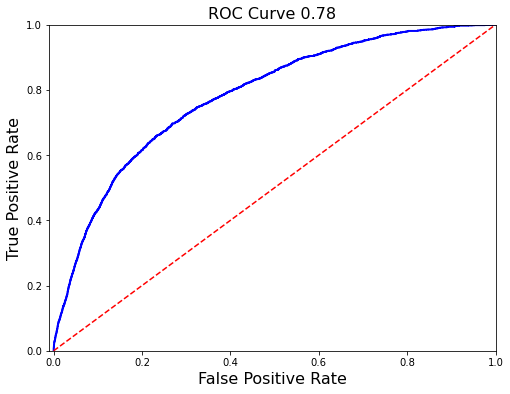

In [302]:
plot_roc_curve(best_vote, X_test_selected, y_test)

## Comparing Models

Now we will compare all the models 

In [312]:
model_names= ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM', 'Catboost', 'Random Forest (undersample)', 'Neural Network', 'Voting']

In [298]:
def get_auc(model, X_test, y_test):
    y_prob= model.predict_proba(X_test)[:,1]
    log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_prob)
    auc = sklearn.metrics.auc(log_fpr, log_tpr)
    return auc

In [303]:
acc_models= [accuracy_score(y_test, best_lg.predict(X_test_selected)),
            accuracy_score(y_test, best_rf.predict(X_test_selected)),
            accuracy_score(y_test, best_xgb.predict(X_test_selected)),
            accuracy_score(y_test, best_lgbm_optuna.predict(X_test_selected)),
            accuracy_score(y_test, best_cat.predict(X_test_selected)),
            accuracy_score(y_test, best_brf.predict(X_test_selected)),
            accuracy_score(y_test, y_pred_nn_2_act),
            accuracy_score(y_test, best_vote.predict(X_test_selected))
            ]

In [318]:
prec_models= [precision_score(y_test, best_lg.predict(X_test_selected)),
            precision_score(y_test, best_rf.predict(X_test_selected)),
            precision_score(y_test, best_xgb.predict(X_test_selected)),
            precision_score(y_test, best_lgbm_optuna.predict(X_test_selected)),
            precision_score(y_test, best_cat.predict(X_test_selected)),
            precision_score(y_test, best_brf.predict(X_test_selected)),
            precision_score(y_test, y_pred_nn_2_act), precision_score(y_test, best_vote.predict(X_test_selected))]

recall_models= [recall_score(y_test, best_lg.predict(X_test_selected)),
            recall_score(y_test, best_rf.predict(X_test_selected)),
            recall_score(y_test, best_xgb.predict(X_test_selected)),
            recall_score(y_test, best_lgbm_optuna.predict(X_test_selected)),
            recall_score(y_test, best_cat.predict(X_test_selected)),
            recall_score(y_test, best_brf.predict(X_test_selected)),
            recall_score(y_test, y_pred_nn_2_act), recall_score(y_test, best_vote.predict(X_test_selected))]

f2_models= [fbeta_score(y_test, best_lg.predict(X_test_selected), beta=2),
            fbeta_score(y_test, best_rf.predict(X_test_selected), beta=2),
            fbeta_score(y_test, best_xgb.predict(X_test_selected), beta=2),
            fbeta_score(y_test, best_lgbm_optuna.predict(X_test_selected), beta=2),
            fbeta_score(y_test, best_cat.predict(X_test_selected), beta=2),
            fbeta_score(y_test, best_brf.predict(X_test_selected), beta=2),
            fbeta_score(y_test, y_pred_nn_2_act, beta=2),fbeta_score(y_test, best_vote.predict(X_test_selected), beta=2)]

In [341]:
auc_models= [get_auc(best_lg,X_test_selected, y_test),
           get_auc(best_rf,X_test_selected, y_test),
           get_auc(best_xgb,X_test_selected, y_test),
           get_auc(best_lgbm,X_test_selected, y_test),
           get_auc(best_cat,X_test_selected, y_test),
           get_auc(best_brf,X_test_selected, y_test), 0.81,get_auc(best_vote,X_test_selected, y_test) ]

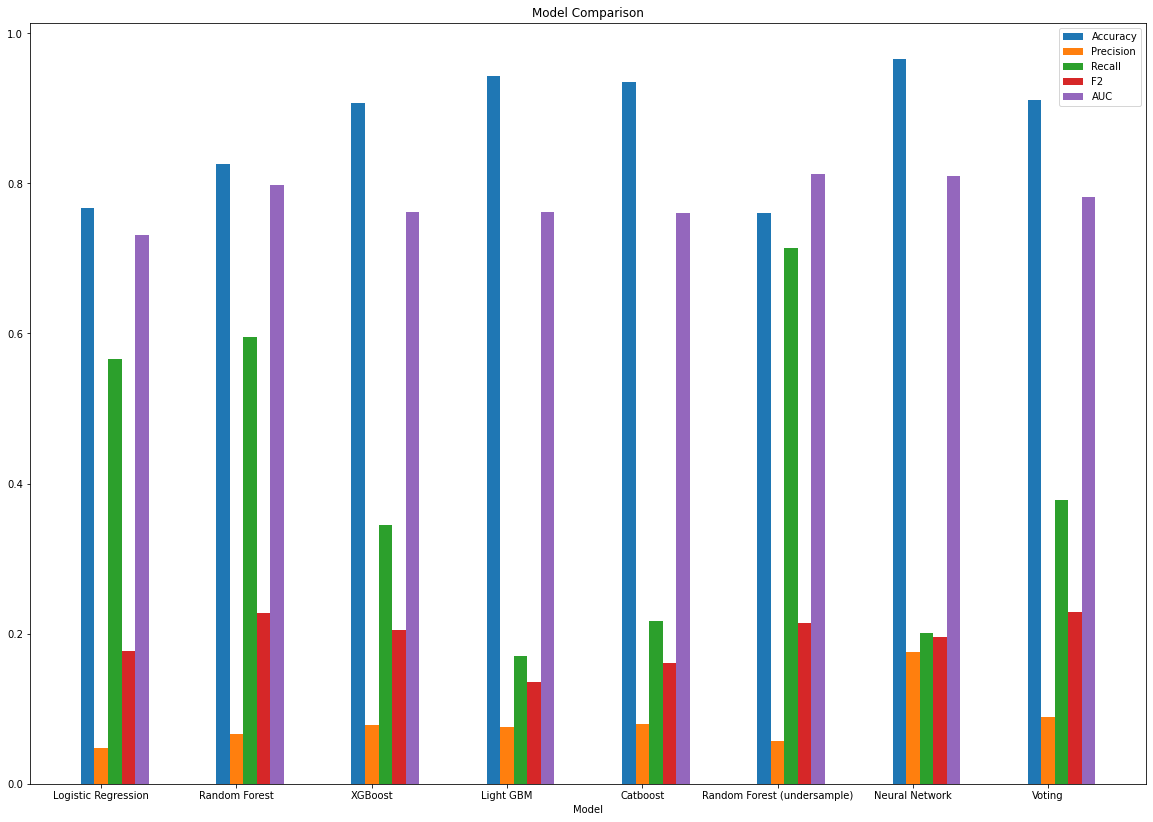

In [342]:
plt.figure(figsize=(20,14))
#title_1= ("Model Comparison")
#plt.title(title_1, fontsize=16)
plt.bar(X_axis - 0.1, acc_models, 0.1, label = 'Accuracy')
plt.bar(X_axis, prec_models, 0.1, label = 'Precision')
plt.bar(X_axis + 0.1, recall_models, 0.1, label = 'Recall')
plt.bar(X_axis + 0.2, f2_models, 0.1, label = 'F2')
plt.bar(X_axis +0.3, auc_models, 0.1, label = 'AUC')
  
plt.xticks(X_axis, model_names)
plt.xlabel("Model")
plt.ylabel("")
plt.title("Model Comparison")
plt.legend()
plt.show()

After comparing all the models, Neural Networks mostly performed better than all, although Voting and Random Forest came to be pretty close. Rest of all the models performed average

## The Max AUC score is 0.812

### Saving Models and Scalers

In [343]:
import pickle

In [344]:
pickle.dump(best_lg, open('Logistic.sav', 'wb'))
pickle.dump(best_cat, open('catboost.sav', 'wb'))
pickle.dump(best_brf, open('B_rf.sav', 'wb'))
pickle.dump(best_lgbm_optuna, open('LGBM.sav', 'wb'))
pickle.dump(best_rf, open('rf.sav', 'wb'))
pickle.dump(best_xgb, open('XGB.sav', 'wb'))
pickle.dump(best_vote, open('vote.sav', 'wb'))

In [346]:
pickle.dump(scaler_9, open('scaler_9.sav', 'wb'))
pickle.dump(scaler_10, open('scaler_10.sav', 'wb'))
pickle.dump(scaler_51, open('scaler_51.sav', 'wb'))
pickle.dump(scaler_54, open('scaler_54.sav', 'wb'))